### 2) Найти всю полезную информацию для исследования и предоставить выводы в виде презентации (1 слайд) или внутри документа excel в привязке к NPS

In [1]:
import pandas as pd
import numpy as np

df2 = pd.read_excel('Тестовое Задание Excel Like Center.xlsx', sheet_name=2)

print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8112 entries, 0 to 8111
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Клиент                8112 non-null   int64 
 1   Продукт; год покупки  8112 non-null   object
 2   Регион                8112 non-null   object
dtypes: int64(1), object(2)
memory usage: 190.2+ KB
None


In [2]:
df2.sample(2)

,Клиент,Продукт; год покупки,Регион
5646,2944004,МсА;2022,Россия (остальные регионы)
4018,4948801,МсА;2020,Россия (остальные регионы)


In [3]:
# трансформируем для удобства

df2['Продукт'] = df2['Продукт; год покупки'].str.split(';').explode()[::2]
df2['Год покупки'] = df2['Продукт; год покупки'].str.split(';').explode()[1::2]

df2.drop(columns= ['Продукт; год покупки'], inplace=True)

df2.sample(2)

,Клиент,Регион,Продукт,Год покупки
4687,4215302,Россия (остальные регионы),Сотка,2021
6657,1863695,Россия (остальные регионы),Скорость,2021


In [4]:
# уникальные категории

print(df2['Продукт'].unique())
print(df2['Год покупки'].unique())
print(df2['Регион'].unique())

['МсА' 'Скорость' 'Сотка']
['2022' '2021' '2020']
['Москва, РФ' 'Россия (остальные регионы)' 'Америка (Латинская)'
 'Европа, ЕС' 'Америка (США)']


In [5]:
# добавим данные из первого листа

df1 = pd.read_excel('Тестовое Задание Excel Like Center.xlsx', sheet_name=1)
df1['Клиент'] = df1['Идентификатор Клиента'].str[3:].astype(int)
df1.drop(columns= ['Идентификатор Клиента'], inplace=True)
df1.sample(2)

,Дата опроса,Оценка,Клиент
3023,44941,10,3884172
1416,44936,8,2816599


In [6]:
# объединим данные

df = df1.merge(df2, on=['Клиент'])

df['prom'] = df['Оценка'].apply(lambda x: 1 if ((x==10) | (x==9)) else 0  if ((x==8) | (x==7)) else -1)
df.sample(3)

,Дата опроса,Оценка,Клиент,Регион,Продукт,Год покупки,prom
1896,44934,3,1764697,Россия (остальные регионы),Сотка,2022,-1
2080,44945,10,2007707,Россия (остальные регионы),МсА,2021,1
2508,44944,10,3389229,Россия (остальные регионы),Сотка,2022,1


In [7]:
# проверка на корректность объединения

df.isna().sum().sum()

0

### NPS по Регионам

In [8]:
df_ru = df[(df['Регион']=='Москва, РФ') | (df['Регион']=='Россия (остальные регионы)')]
df_eu = df[(df['Регион']== 'Европа, ЕС')]
df_usa = df[(df['Регион']=='Америка (США)')]
df_latam = df[(df['Регион']=='Америка (Латинская)')]

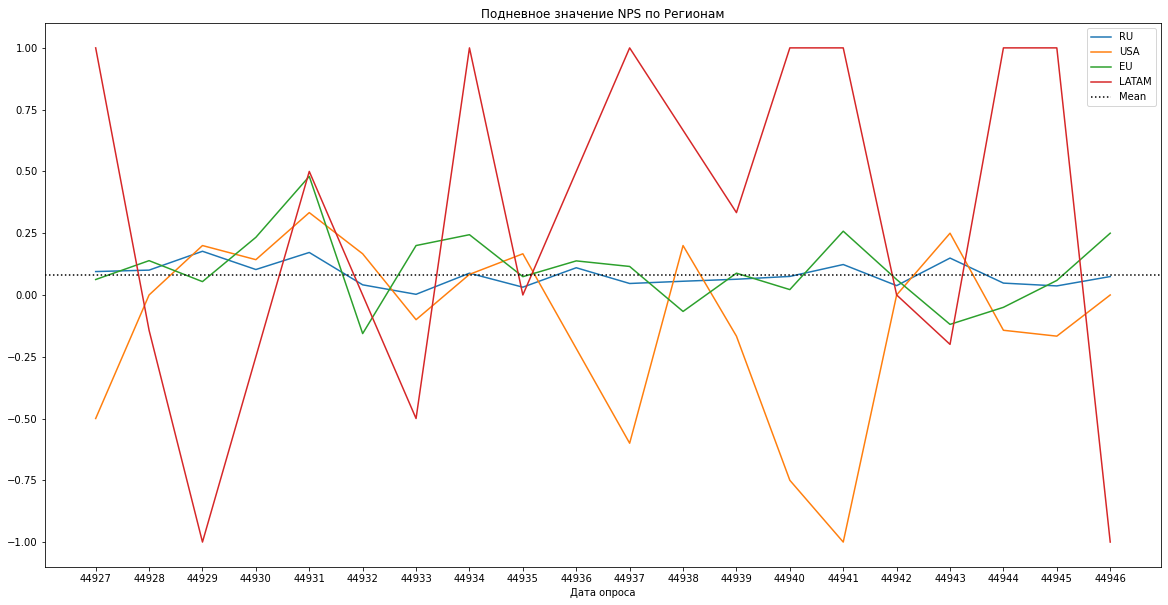

In [9]:
import matplotlib.pyplot as plt

date_list = df['Дата опроса'].unique()

plt.figure(figsize = (20, 10))
plt.xticks(date_list)

df_ru.groupby('Дата опроса')['prom'].mean().plot(label= 'RU')
df_usa.groupby('Дата опроса')['prom'].mean().plot(label= 'USA')
df_eu.groupby('Дата опроса')['prom'].mean().plot(label= 'EU')
df_latam.groupby('Дата опроса')['prom'].mean().plot(label= 'LATAM')

plt.axhline(y=df['prom'].mean(), color='k', label= 'Mean', linestyle= 'dotted')

plt.legend()
plt.title('Подневное значение NPS по Регионам');

### NPS по Продуктам

In [10]:
df_mca = df[(df['Продукт']== 'МсА')]
df_speed = df[(df['Продукт']=='Скорость')]
df_100 = df[(df['Продукт']=='Сотка')]

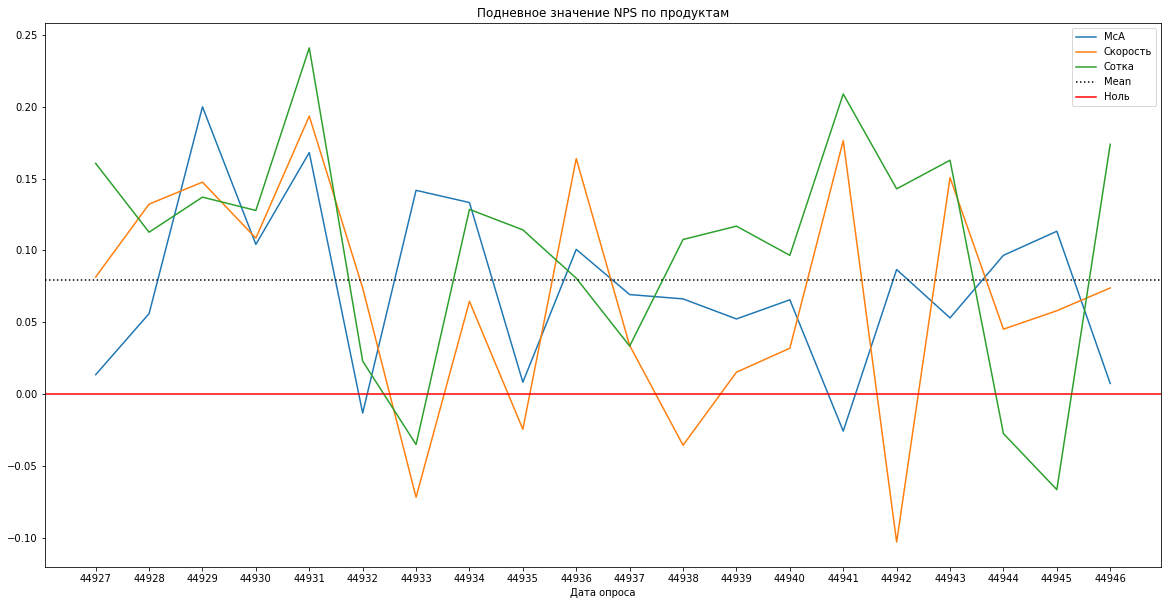

In [11]:
plt.figure(figsize = (20, 10))
plt.xticks(date_list)

df_mca.groupby('Дата опроса')['prom'].mean().plot(label= 'McA')
df_speed.groupby('Дата опроса')['prom'].mean().plot(label= 'Скорость')
df_100.groupby('Дата опроса')['prom'].mean().plot(label= 'Сотка')

plt.axhline(y=df['prom'].mean(), color='k', label= 'Mean', linestyle= 'dotted')
plt.axhline(y=0, color='r', label= 'Ноль')

plt.legend()
plt.title('Подневное значение NPS по продуктам');

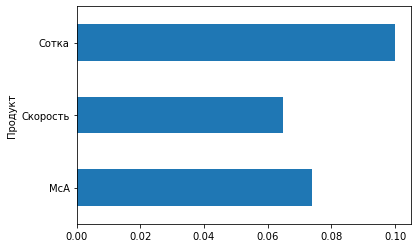

In [12]:
# NPS по продуктам в общем

df.groupby('Продукт').prom.mean().plot.barh();

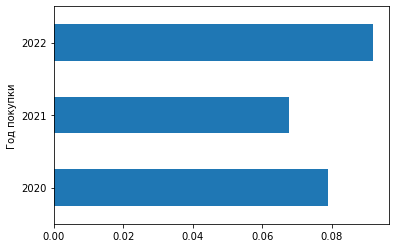

In [13]:
# NPS по Годам покупки

df.groupby('Год покупки').prom.mean().plot.barh();

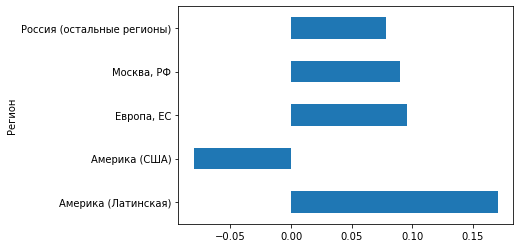

In [14]:
# NPS по Регионам в общем

df.groupby('Регион').prom.mean().plot.barh();

In [15]:
print('Доля клиентов в Латинской Америке: ', np.round(df_latam.shape[0] / df.shape[0], 3))
print('Доля клиентов в США: ', np.round(df_usa.shape[0] / df.shape[0], 3))
print('Доля клиентов в Европре: ', np.round(df_eu.shape[0] / df.shape[0], 3))
print('Доля клиентов в РФ: ', np.round(df_ru.shape[0] / df.shape[0], 3))

Доля клиентов в Латинской Америке:  0.005
Доля клиентов в США:  0.014
Доля клиентов в Европре:  0.083
Доля клиентов в РФ:  0.898


## Выводы

- делать выводы по NPS для Латинской Америке и для США сложно из-за малого количества клиентов, но все-же можно заметить, что в США продукт не оправдывает ожидания клиентов, а клиенты в ЛАТАМ в целом настроены положительно
- подавляющее количество клиентов из РФ (90%) 
- наибольшая лояльность у пользователей продукта "Сотка"
- в 2021 году явно что-то пошло не так, но были сделаны правильные выводы
- на начальном этапе рассматриваемого временного интервала не было отрицательной лояльности по продуктам
- на начальном этапе рассматриваемого временного интервала ВСЕ продукты демонстрировали рост лояльности и также ВСЕ продукты затем продемонстрировали резкое падение, необходимо понять, что произошло, т.к.

        Увеличение лояльности на 2% дает снижение издержек на 10%, а это в свою очередь ведет к увеличению прибыли в среднем на 16% без увеличения объемов продаж и цен (Leading on the Edge of Chaos, Emmet Murphy & Mark Murphy).